In [1]:
import tensorflow as tf
from urllib.request import urlretrieve
from os.path import isfile, isdir
#from tqdm import tqdm 
#import tarfile
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

Using TensorFlow backend.


**import X_train and y_train : in this format** *{array(img),label}*

In [30]:
def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


cifar10_dataset_folder_path='C:/Users/adamelio/Desktop/cifar RECOG IMAGE/cifar-10-batches-py'
def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
    with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
        # note the encoding type is 'latin1'
        batch = pickle.load(file, encoding='latin1')
        
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']
        
    return features, labels


prova,label=load_cfar10_batch(cifar10_dataset_folder_path, 1)

print('the number of images in the X_train set is: '+str(len(prova))+' with the foolowing number of labels (y_train): '+str(len(label)))


the number of images in the X_train set is: 10000 with the foolowing number of labels (y_train): 10000


**Just to see..what's going on..we visualize the first 10 image of the train set**

['truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat', 'deer', 'horse', 'horse', 'bird', 'truck', 'truck', 'truck', 'cat', 'bird', 'frog', 'deer']


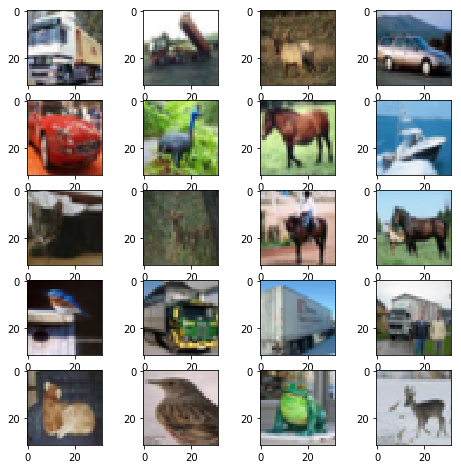

In [31]:
name=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num=[i for i in range(0,10)]
dizio=dict(zip(num,name))

lab=[]
for i in label[1:21]:
    lab.append(dizio[i])
print(lab)


w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(prova[i])
plt.show()

**Import TEST (let's take the first 5 hundred sample)**

In [32]:


def load_cfar10_batch_test(cifar10_dataset_folder_path):
    with open(cifar10_dataset_folder_path + '/test_batch', mode='rb') as file:
        # note the encoding type is 'latin1'
        batch = pickle.load(file, encoding='latin1')
        
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']
        
    return features, labels


prova_test,label_test=load_cfar10_batch_test(cifar10_dataset_folder_path)
prova_test=prova_test[:500]
label_test=label_test[:500]

print('the number of images in the X_train set is: '+str(len(prova_test))+' with the foolowing number of labels (y_train): '+str(len(label_test)))



the number of images in the X_train set is: 500 with the foolowing number of labels (y_train): 500


**Display image of the TEST**

['ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile', 'airplane', 'truck', 'dog', 'horse', 'truck', 'ship', 'dog', 'horse', 'ship', 'frog', 'horse']


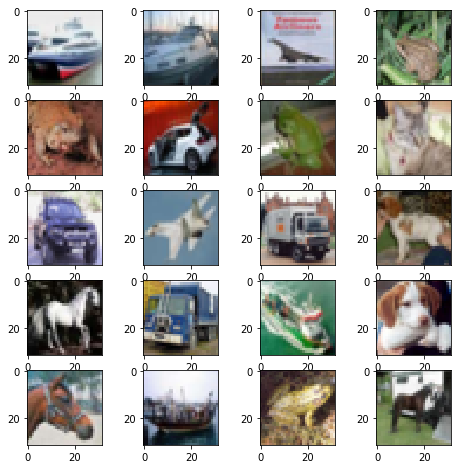

In [33]:
name=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num=[i for i in range(0,10)]
dizio=dict(zip(num,name))

lab=[]
for i in label_test[1:21]:
    lab.append(dizio[i])
print(lab)




w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    
    plt.imshow(prova_test[i])
    
plt.show()


**convert the X_train images in numpy array**

In [34]:
X_train=np.asarray(prova)

In [35]:
type(X_train)

numpy.ndarray

In [36]:
X_train.shape #10 thousand image with 32 x 32 size and 3 channels rgb

(10000, 32, 32, 3)

In [37]:
#again as we did for the X_train set, we convert the y_train (labels) in numpy array
y_train=np.asarray(label)

In [38]:
y_train #what does it mean this output?? it means that the first image in the X_train has a label equal to 6 (so it's a frog)

array([6, 9, 9, ..., 1, 1, 5])

At this point is so important to use LabelHotEncoder to encode the labels in the following format:

| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 0 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 |

In [39]:
enc = LabelEncoder()

# #### Font  encoder

encoder=enc.fit(y_train)
enc_transf=enc.transform(y_train)
y_train=np_utils.to_categorical(enc_transf)
y_train.shape

(10000, 10)

In [40]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [41]:
X_train.shape[1:]

(32, 32, 3)

**Do the same stuffs for the test set**

In [42]:
X_test=np.asarray(prova_test)
X_test.shape

(500, 32, 32, 3)

In [43]:
y_test=np.asarray(label_test)
y_test

enc = LabelEncoder()

# #### Font  encoder

encoder=enc.fit(y_test)
enc_transf=enc.transform(y_test)
y_test=np_utils.to_categorical(enc_transf)
y_test.shape

(500, 10)

### Building up the Convolutional Net

In [44]:
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np


batch_size = 64
num_classes = 10
epochs = 100


 
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    elif epoch > 100:
        lrate = 0.0003       
    return lrate
 
#z-score
mean = np.mean(X_train,axis=(0,1,2,3))
std = np.std(X_train,axis=(0,1,2,3))
X_train = (X_train-mean)/(std+1e-7)


weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:], kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

'''model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))'''


##### Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)

In [45]:
# initiate RMSprop optimizer
import keras
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

"model.compile(loss='categorical_crossentropy',\n              optimizer='Adam',\n              metrics=['accuracy'])"

In [ ]:
#batch_size = 64
 
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=X_train.shape[0] // batch_size,epochs=20,\
                    verbose=1,validation_data=(X_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])

Epoch 1/20
156/156 [==============================] - 410s 3s/step - loss: 2.3944 - acc: 0.2997 - val_loss: 13.9885 - val_acc: 0.1280
Epoch 2/20
156/156 [==============================] - 384s 2s/step - loss: 1.8579 - acc: 0.3846 - val_loss: 11.7913 - val_acc: 0.2580
Epoch 3/20
156/156 [==============================] - 469s 3s/step - loss: 1.6581 - acc: 0.4436 - val_loss: 13.3928 - val_acc: 0.1600
Epoch 4/20
156/156 [==============================] - 526s 3s/step - loss: 1.5338 - acc: 0.4846 - val_loss: 12.4669 - val_acc: 0.2040
Epoch 5/20
156/156 [==============================] - 379s 2s/step - loss: 1.4251 - acc: 0.5302 - val_loss: 11.5391 - val_acc: 0.2640
Epoch 6/20
156/156 [==============================] - 377s 2s/step - loss: 1.3621 - acc: 0.5458 - val_loss: 11.9553 - val_acc: 0.2340
Epoch 7/20
156/156 [==============================] - 354s 2s/step - loss: 1.2473 - acc: 0.5829 - val_loss: 12.8846 - val_acc: 0.1900
Epoch 8/20
156/156 [==============================] - 337s 2s/

**Save the model and evaluate accuracy on test set**

In [ ]:

model_json = model.to_json()
with open('C:/Users/adamelio/Desktop/cifar RECOG IMAGE/model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('C:/Users/adamelio/Desktop/cifar RECOG IMAGE/model.h5') 
  
#testing
scores = model.evaluate(X_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0])

**Let s see some prediction on the test based on our training model**

136
the predicted label is: automobile


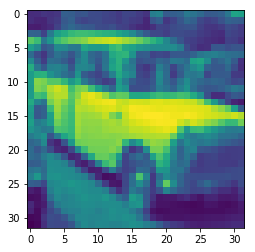

In [82]:
image=int(input())
pred=model.predict(X_train[image].reshape(1,32,32,3))
plt.imshow(X_train[image,:,:,0])
lista=pred.tolist()
sorted_label=[i for i in range(10)]
label_column=[] 
lista=lista[0]
index=lista.index(max(lista))
#label_column.append(sorted_label[index])
name=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num=[i for i in range(0,10)]
dizio=dict(zip(num,name))
print("the predicted label is: "+str(dizio[sorted_label[index]]))
